In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import peakutils
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from scipy.signal import savgol_filter
from sklearn.model_selection import GridSearchCV
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 15]

In [3]:
Hay_data_train = pd.read_excel('Hay_ensile_data/DL_ENsH_CP_train_1.xlsx')
Hay_data_val = pd.read_excel('Hay_ensile_data/validation.xlsx')

In [4]:
def convert_abs(input):
    for i in range(input.shape[0]):
        input.iloc[i] = 2-np.log10(input.iloc[i])
    return input


In [5]:
CP = Hay_data_train['CP']
sample_ID = Hay_data_train['Sample ID']
scanner_ID = Hay_data_train['Scanner ID']
spectra_ref = Hay_data_train.drop(['Scanner ID','Sample ID','CP'],axis=1)
wav = spectra_ref.keys()

In [6]:
CP_test = Hay_data_val['CP']
sample_ID_test = Hay_data_val['sampleID']
Scanner_Id  = Hay_data_val['scannerID']
spectra_ref_test = Hay_data_val.drop(['scannerID','sampleID','CP'],axis=1)


In [7]:
spectra_abs =  convert_abs(spectra_ref.copy(deep=True))
spectra_abs_test = convert_abs(spectra_ref_test.copy(deep=True))
#spectra_abs = spectra_ref
#spectra_abs_test =spectra_ref_test

<AxesSubplot:>

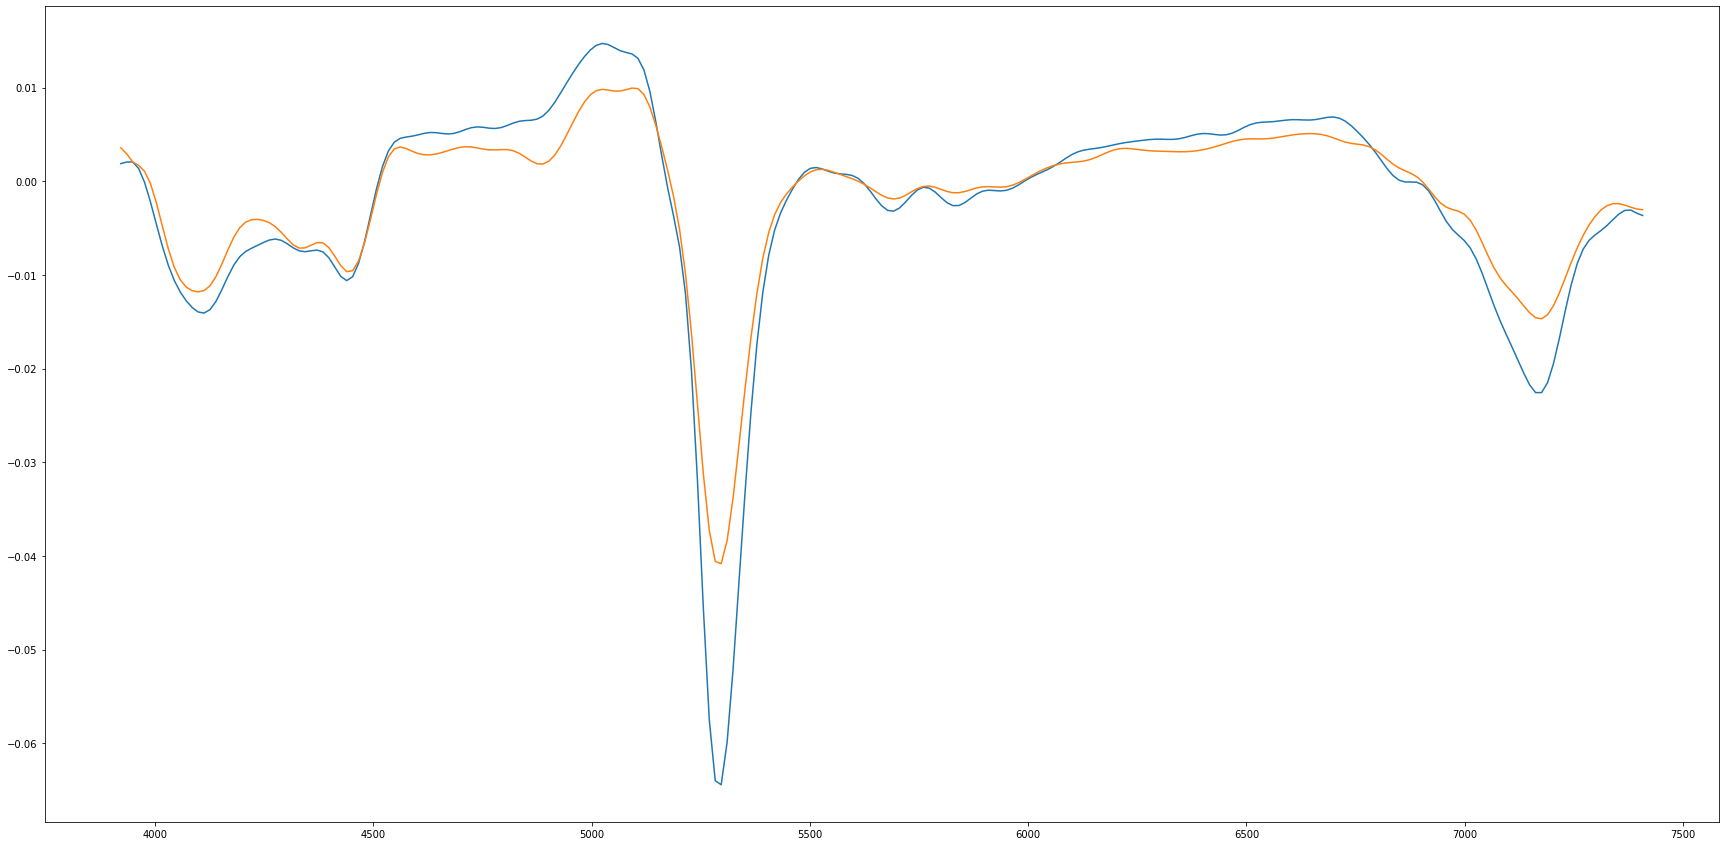

In [8]:

spectra_abs = np.gradient(spectra_abs.copy(deep=True).to_numpy(),axis=1)
spectra_abs = pd.DataFrame(spectra_abs,columns=wav)
spectra_abs_test = np.gradient(spectra_abs_test.copy(deep=True).to_numpy(),axis=1)
spectra_abs_test = pd.DataFrame(spectra_abs_test,columns=wav)
spectra_abs_test.iloc[0].plot()
spectra_abs.iloc[0].plot()


In [9]:

def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

In [10]:
spectra_snv = snv(spectra_abs.copy(deep=True).to_numpy())
spectra_snv = pd.DataFrame(spectra_snv,columns=wav)

In [11]:
spectra_snv_test = snv(spectra_abs_test.copy(deep=True).to_numpy())
spectra_snv_test = pd.DataFrame(spectra_snv_test,columns=wav)


<AxesSubplot:>

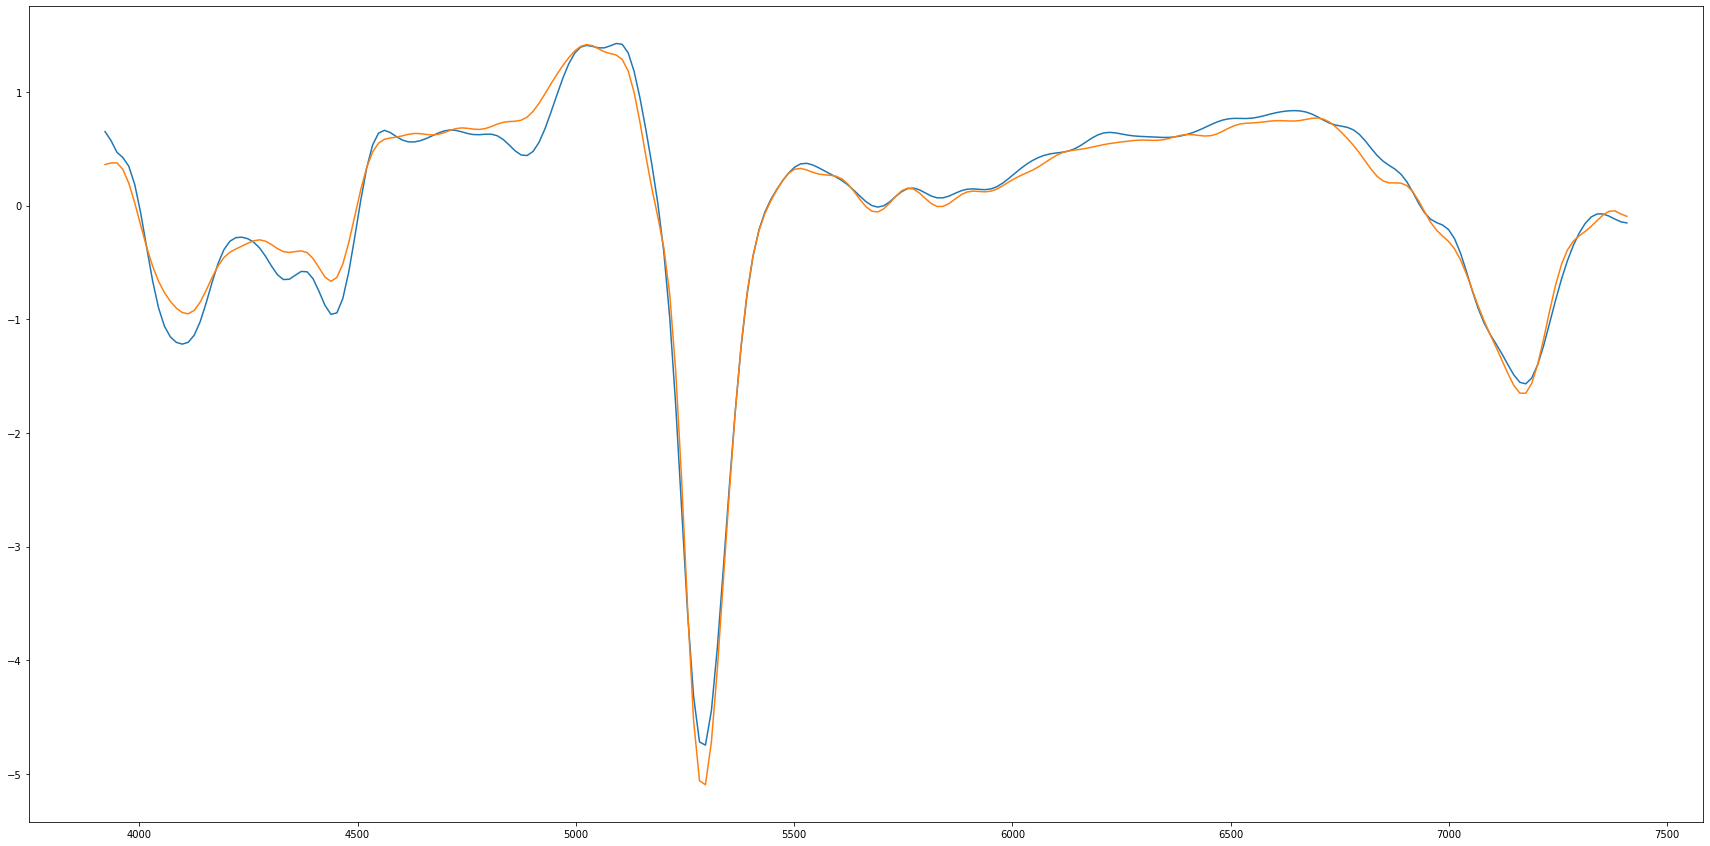

In [12]:
spectra_snv.iloc[0].plot()
spectra_snv_test.iloc[0].plot()

In [58]:
pls = PLSRegression()
params = {'n_components':[i for i in range (15,20)]}
gd = GridSearchCV(pls,params,scoring = 'r2',cv=5)
gd.fit(spectra_snv,CP)
gd.best_score_

/home/ashry/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/ashry/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/ashry/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/ashry/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/ashry/.local/lib/python3.8

-0.11588526600178786